In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('/Users/aasthaprajapati/Desktop/MOCK_DATA (1) copy 2.csv')

In [41]:
df

,wbcs,platelets,dengue
0,11554,474502,dengue
1,16036,577594,dengue
2,7117,183313,safe
3,9180,242012,safe
4,14126,152199,safe
...,...,...,...
995,10025,526906,dengue
996,7000,570246,safe
997,13098,164830,safe
998,19622,566712,dengue


In [42]:
df['wbcs'] = (df['wbcs'] - df['wbcs'].min())/(df['wbcs'].max()-df['wbcs'].min())
df['platelets'] = (df['platelets'] - df['platelets'].min())/(df['platelets'].max()-df['platelets'].min())

In [43]:
df['dengue'] = df['dengue'].astype('category')
df['dengue'] = df['dengue'].cat.codes

In [44]:
df ## normalised threshold 10000 wbc is 0.3548 and for 400000 platelets is 0.55 so 0.91 is total

,wbcs,platelets,dengue
0,0.456973,0.721769,0
1,0.747408,0.951119,0
2,0.169453,0.073958,1
3,0.303136,0.204546,1
4,0.623639,0.004739,1
...,...,...,...
995,0.357893,0.838353,0
996,0.161871,0.934772,1
997,0.557024,0.032839,1
998,0.979782,0.926909,0


In [45]:
split_percentage = 0.75
msk = np.random.rand(len(df)) < split_percentage
train = df[msk]
test = df[~msk]

In [46]:
x = train.iloc[0:,0:-1].values
y = train.iloc[0:,-1:].values
x_test = test.iloc[0:,0:-1].values
y_test = test.iloc[0:,-1:].values

In [47]:
x

array([[0.45697252, 0.721769  ],
       [0.74740798, 0.95111869],
       [0.16945308, 0.07395822],
       ...,
       [0.16187144, 0.93477153],
       [0.97978227, 0.92690941],
       [0.95204769, 0.933301  ]])

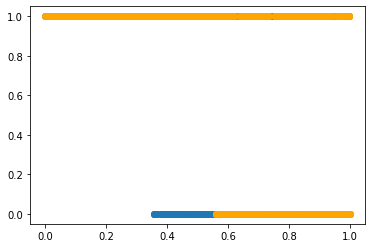

In [48]:
plt.scatter(df['wbcs'], df['dengue'])
plt.scatter(df['platelets'], df['dengue'], color="orange")